# 1. Feedforward: build Relu network

In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

Consider the rectified linear activation function : $h_j = max(0, a_j )$.

### 1. Draw a network with:

    • 2 inputs
    
    • 1 hidden layers with 3 hidden units and a 
    
    • 1-class output (for binary classification)

if image does not load, I've also uploaded the image in the folder

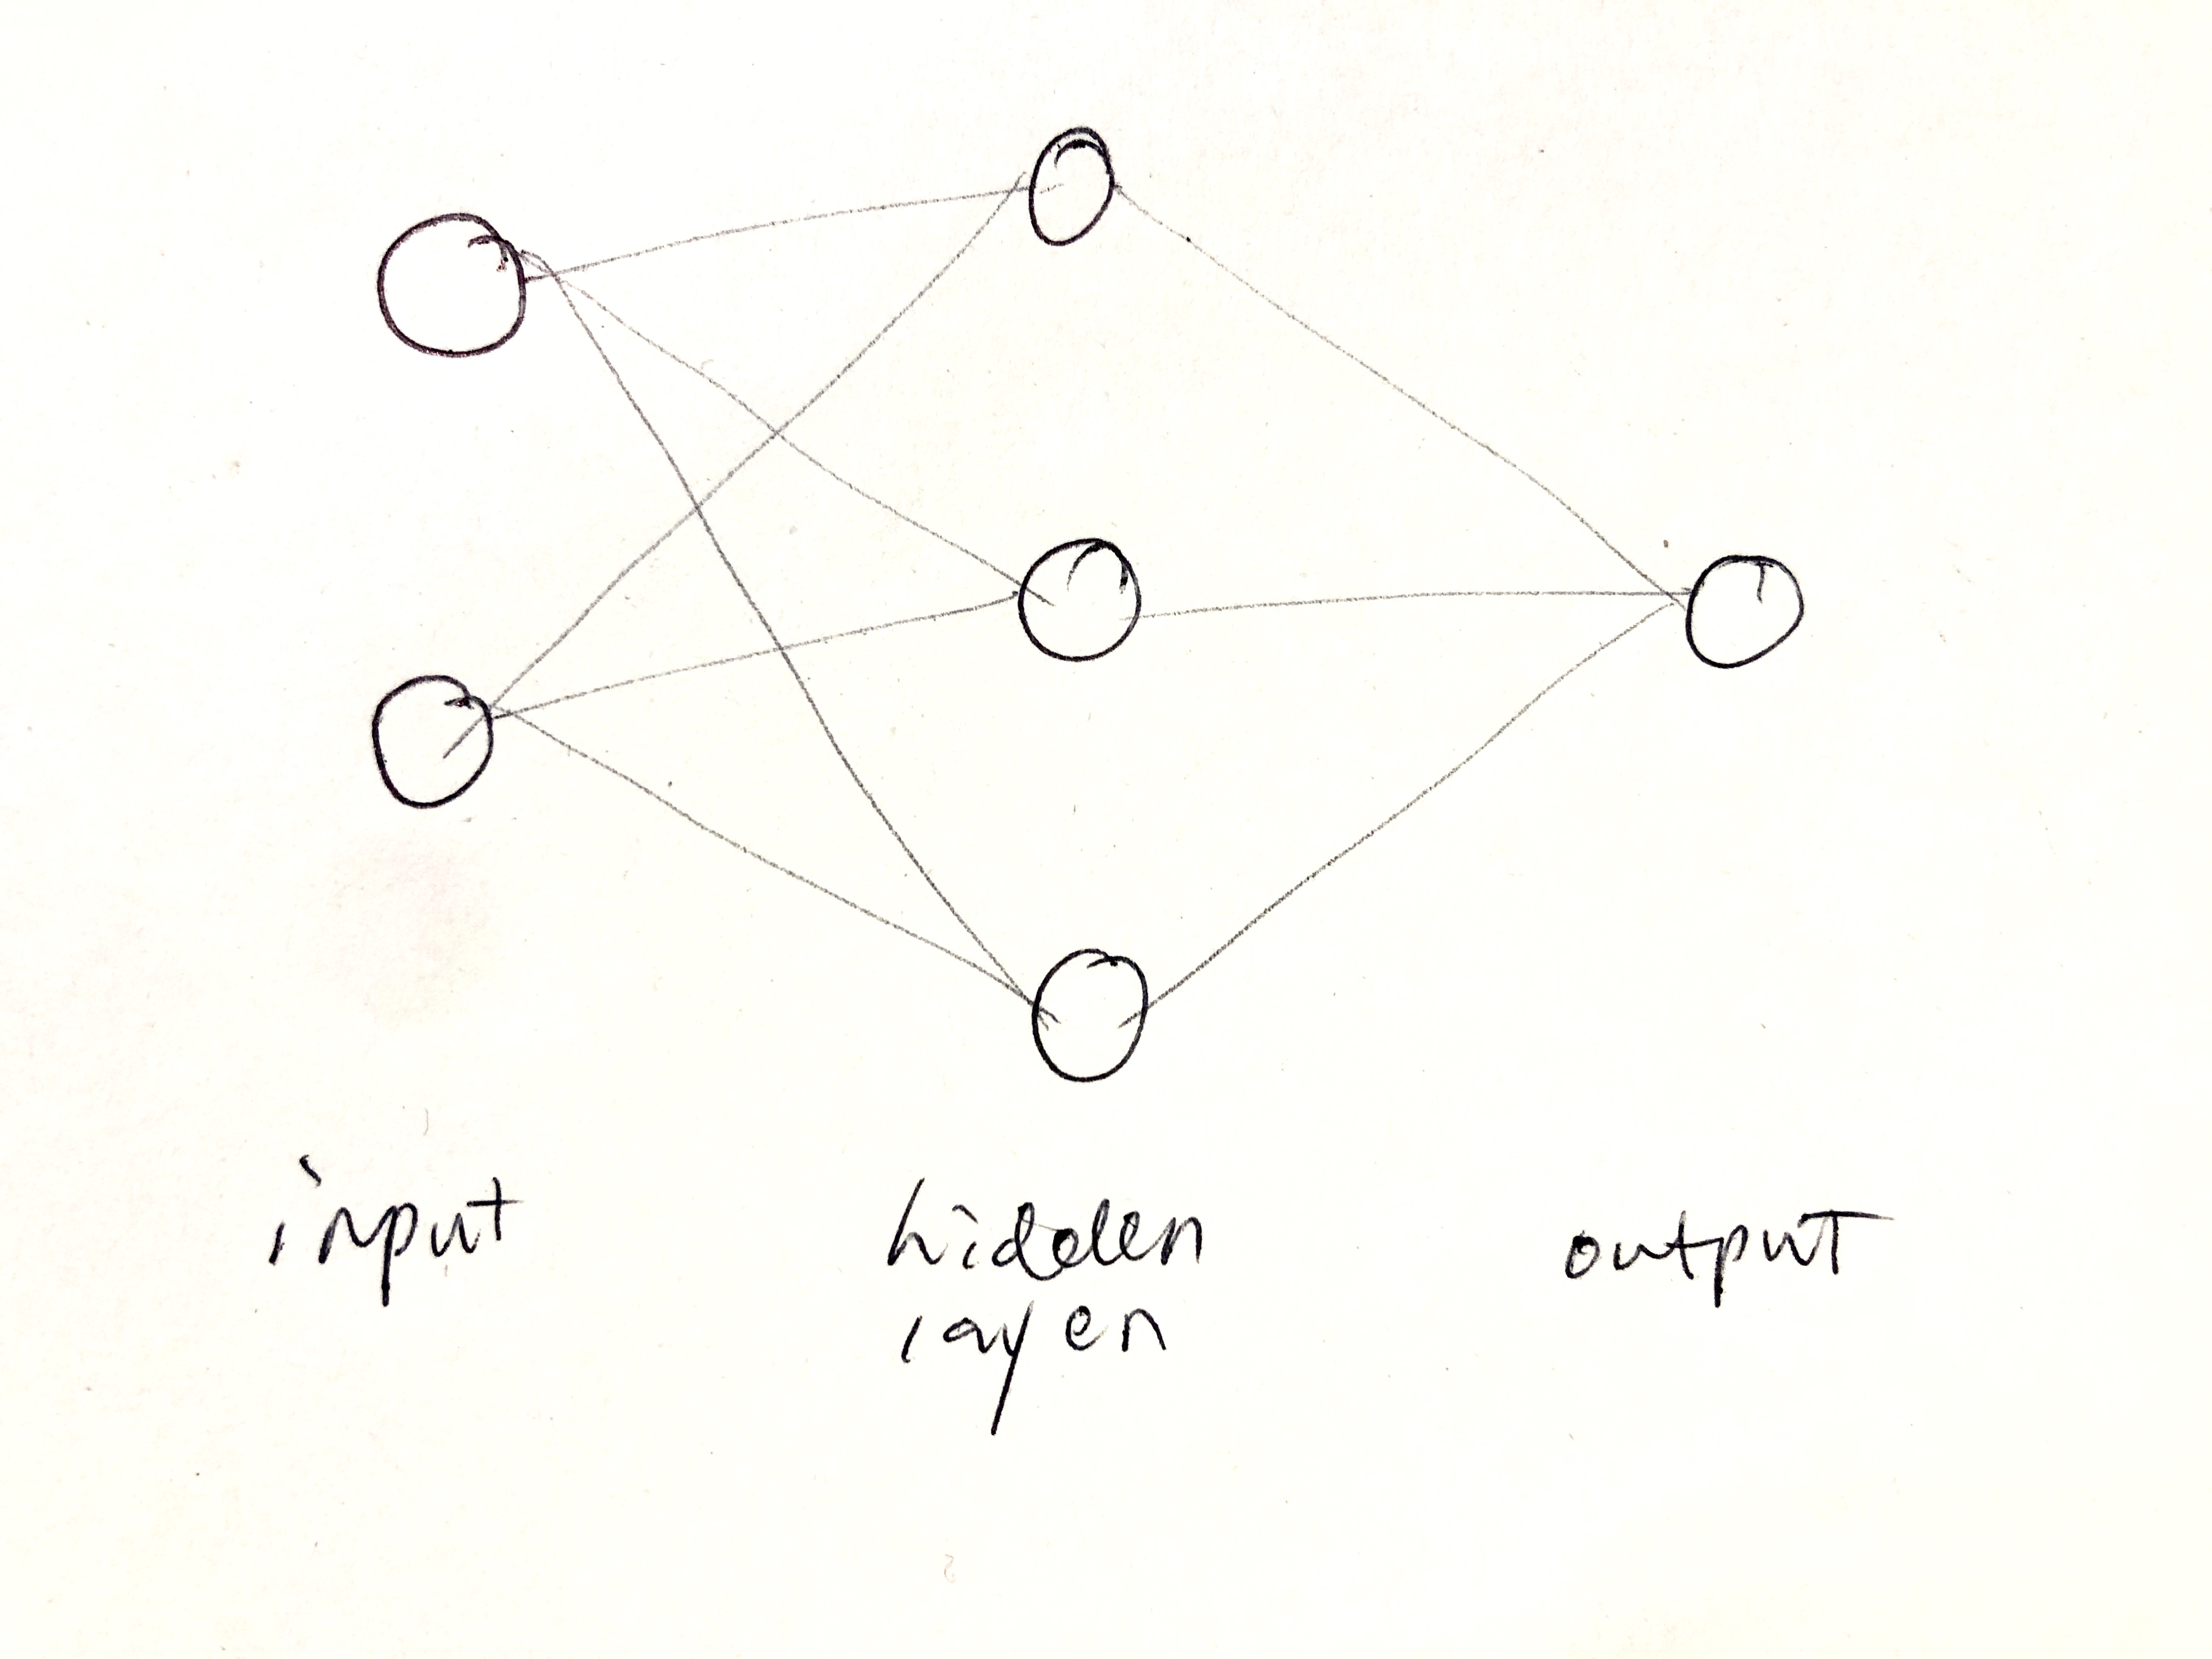

### 2. Write out the mathematical equation for the output of this network (feel free to break the input-output relationship into multiple equations).

Let $a_l$ be the output of lth Layer

$$a_2 = ReLu(w_2 a_1+b_2)$$
$$a_3 = Sigmoid (w_3a_2+b_2) = \frac{1}{1+e^{(-w_3a_2-b_2)}}$$

### 3. Write out the forward-pass function in python

$$f_{nnRelu}(a^{l-1})= ReLu(w^l a^{l-1}+b^l) = \sum_{k} max(w^l_{jk}a^{l-1}_k+b^l_j,0) $$

### 4. Calculate class probabilities

Given that

In [1174]:
X = np.matrix( ((1,-1), (0,-1),(0,1)) )
W= np.matrix( ((1,-1,0), (0, 0, 0.5)) )
V = np.matrix(((1,0,-1)))
b1 = np.matrix((0,0,1))
c = 1

In [1175]:
def relu_func(a):
    # Write a function to apply to each element of the matrix
        return max(a,0)
vRelu = np.vectorize(relu_func)

def sigmoid_func(a):
    return 1/(1+np.exp(-a))
vSigmoid = np.vectorize(sigmoid_func)

In [1176]:
z_h = np.dot(X, W)+b1
a_h = vRelu(z_h)
z_o = np.dot(a_h, V.T)+c 
vSigmoid(np.squeeze(np.asarray(z_o)))

array([0.81757448, 0.62245933, 0.37754067])

# 2. Gradient Descent 

Consider a simple non-convex function of two variables: 

$$f(x,y)=(1−x^3)+100∗(y^2 −x)^2$$

### 1. What are the partial derivatives of f with respect to x and to y?

$\frac{\partial f}{\partial x} = -3x^2 - 200(y^2-x) $

$\frac{\partial f}{\partial y} = 200(-y^2+x)(2y) $

### 2. Create a visualization of the contours of this function.

In [5]:
def f(x, y):
    return (1-x**3)+100*((y**2-x)**2)

In [6]:
def plot_x_y(x,y):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.contour3D(X,Y,Z,80, cmap='binary')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    return ax

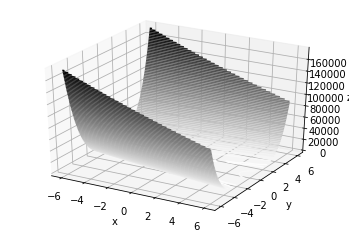

In [7]:
plot_x_y(np.linspace(-6, 6, 30),np.linspace(-6, 6, 30))

### 3. Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [16]:
def grad_f(x, y):
    dLx = -3*(x**2) + 200*(x-y**2)
    dLy = 400*(y**3-x*y)
    return dLx, dLy

In [9]:
def grad_descent(x_start, y_start,iters,lr):
    
    x = x_start
    y = y_start
    x_grads = []
    y_grads = []
    x_traj = []
    y_traj = []
    z_traj=[]
    
    for i in range(iters):
        grad_x, grad_y = grad_f(x, y)
        x_grads.append(grad_x)
        y_grads.append(grad_y)
        x = x - lr * grad_x
        y = y - lr * grad_y
        x_traj.append(x)
        y_traj.append(y)
        z=f(x,y)
        z_traj.append(z)
                
    return pd.DataFrame({'x':x_traj,'y':y_traj,'x_grad':x_grads,'y_grad':y_grads,'z':z_traj})

In [10]:
gd_result1= grad_descent(3,2,1070,0.00001)

In [11]:
gd_result2 = grad_descent(3,2,1070,0.0001)

In [12]:
gd_result3= grad_descent(3,2,1070,0.001)

### Visualize the progression of Z value as the gradient descent algorithm proceeds: 

Text(0.5, 1.0, 'lr = 0.00001')

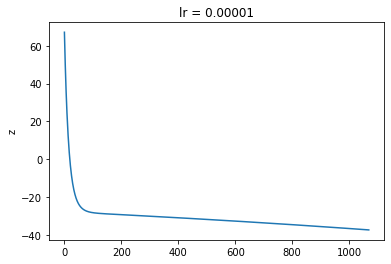

In [13]:
ax= sns.lineplot(range(1070),gd_result1['z'])
ax.set_title('lr = 0.00001')

Text(0.5, 1, 'lr = 0.0001')

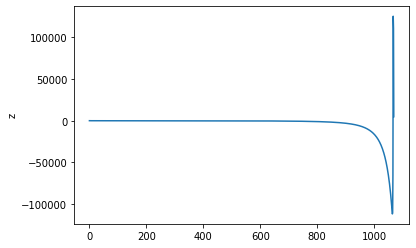

In [14]:
sns.lineplot(range(1070),gd_result2['z'])
ax.set_title('lr = 0.0001')

Text(0.5, 1.0, 'lr = 0.001')

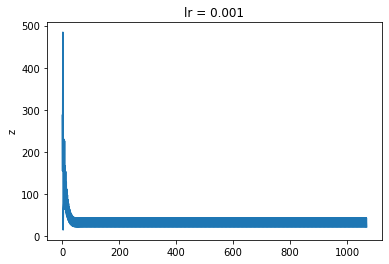

In [15]:
ax= sns.lineplot(range(1070),gd_result3['z'])
ax.set_title('lr = 0.001')

### 4. Write a Gradient Descent With Momentum algorithm for finding the mini- mum. Visualize your results with a few different settings of the algorithm’s hyperparameters.

In [25]:
def grad_descent_m(x_start, y_start,iters,lr,alpha):
    
    x = x_start
    y = y_start
    x_grads = []
    y_grads = []
    x_traj = []
    y_traj = []
    z_traj=[]
    v_x = 0
    v_y = 0 
    
    for i in range(iters):
        grad_x, grad_y = grad_f(x, y)
        x_grads.append(grad_x)
        y_grads.append(grad_y)
        # update velocity
        v_x = alpha * v_x - lr * grad_x
        v_y = alpha * v_y - lr * grad_y
        # update x and y
        x = x + v_x
        y = y + v_y 
        # store value 
        x_traj.append(x)
        y_traj.append(y)
        z=f(x,y)
        z_traj.append(z)
                
        
    return pd.DataFrame({'x':x_traj,'y':y_traj,'x_grad':x_grads,'y_grad':y_grads,'z':z_traj})

In [46]:
gdm_1 = pd.DataFrame({
    'alpha = 0.1': grad_descent_m(3,2,1070,0.00001,0.1)['z'],
    'alpha = 0.3': grad_descent_m(3,2,1070,0.00001,0.3)['z'],
    'alpha = 0.5': grad_descent_m(3,2,1070,0.00001,0.5)['z'],
    'alpha = 0.7': grad_descent_m(3,2,1070,0.00001,0.7)['z']
})

Text(0, 0.5, 'z')

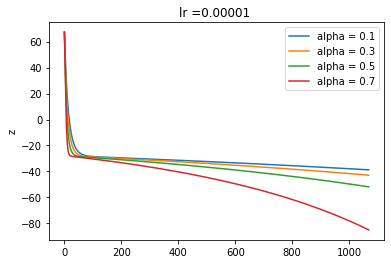

In [81]:
ax= sns.lineplot(range(1070),gdm_1['alpha = 0.1'],label='alpha = 0.1')
sns.lineplot(range(1070),gdm_1['alpha = 0.3'],label='alpha = 0.3')
sns.lineplot(range(1070),gdm_1['alpha = 0.5'],label='alpha = 0.5')
sns.lineplot(range(1070),gdm_1['alpha = 0.7'],label='alpha = 0.7')
ax. legend()
ax.set_title('lr =0.00001 ')
ax.set_ylabel('z')

In [82]:
gdm_2 = pd.DataFrame({
    'alpha = 0.1': grad_descent_m(3,2,1070,0.000001,0.1)['z'],
    'alpha = 0.3': grad_descent_m(3,2,1070,0.000001,0.3)['z'],
    'alpha = 0.5': grad_descent_m(3,2,1070,0.000001,0.5)['z'],
    'alpha = 0.7': grad_descent_m(3,2,1070,0.000001,0.7)['z'],    
})

Text(0, 0.5, 'z')

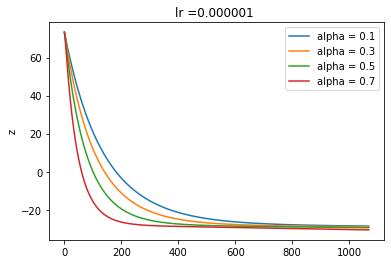

In [83]:
ax= sns.lineplot(range(1070),gdm_2['alpha = 0.1'],label='alpha = 0.1')
sns.lineplot(range(1070),gdm_2['alpha = 0.3'],label='alpha = 0.3')
sns.lineplot(range(1070),gdm_2['alpha = 0.5'],label='alpha = 0.5')
sns.lineplot(range(1070),gdm_2['alpha = 0.7'],label='alpha = 0.7')
ax. legend()
ax.set_title('lr =0.000001 ')
ax.set_ylabel('z')

# 3. Backprop 

### 1. For the same network as in Question 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.

**Loss with respect to Beta in the output layer (L3)**

$$ \frac{{d C}}{{d \beta^3}} = \frac{{d C}}{{d z^3}} = \frac{\partial C}{\partial a^3} * \frac{\partial a^3}{\partial Z^3}$$


$$ = -(\frac{y}{a^3} - \frac{1-y}{1-a^3}) * \frac{e^{(-z^3)}}{(1+e^{-z})^2}$$

**Loss with respect to Beta in L2 (hidden layer)**

$$\frac{{d C}}{{d \beta^2}} = \frac{\partial C}{\partial a^3} * \frac{\partial a^3}{\partial Z^3} * \frac{\partial z^3}{\partial a^2} * \frac{\partial a^2}{\partial z^2}$$

when $z^2_i$>0:
$$  =(\frac{y}{a^3} - \frac{1-y}{1-a^3}) * \frac{e^{(-z^3)}}{(1+e^{-z})^2} * w^3_i * 1$$

when $z^2_i$<0:
$$  = 0 $$

**Loss with respect to Weight in output layer (L3)**

$$ \frac{{d C}}{{d w^3_i}} = \frac{{d C}}{{d z^3}} * \frac{{d z^3}}{{d w^3_i}} = (\frac{y}{a^3} - \frac{1-y}{1-a^3}) * \frac{e^{(-z^3)}}{(1+e^{-z})^2} * a^2_i$$

**Loss with respect to Weight in hidden layer (L2)**

$$ \frac{{d C}}{{d w^2_{jk}}} = $$

when $z^2_i$>0:
$$\frac{{d C}}{{d z^2_k}} * \frac{{d z^2_k}}{{d w^2_{jk}}} = (\frac{y}{a^3} - \frac{1-y}{1-a^3}) * \frac{e^{(-z^3)}}{(1+e^{-z})^2} * w^3_k * a^1_j$$

when $z^2_i$<0:
$$  = 0 $$

### 2. Write a function grad f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [760]:
def cost_derivative(output_activations, real_y):
    result = []
    for i in range(len(real_y)):
        if output_activations[i] == 1:
            der = float('nan')
            result.append(der)
        else: 
            y = real_y[i]
            a = output_activations[i]
            der= (-y/a +(1-y)/(1-a)).item(0) # cost derivative of Loss function 
            result.append(der)
    return np.asarray(result)

def sigmoid(z):
    return np.array(1.0/(1.0+np.exp(-z)))

def sigmoid_prime(z):
    return np.array(sigmoid(z)*(1-sigmoid(z)))

def relu_prime(z_vec):
    def get_prime(z):
        if z>0:
            return 1
        else:
            return 0
    vprime = np.vectorize(get_prime)
    return vprime(z_vec)

def forward(x,w,b):
    z = np.dot(x,w.T)+b
    def relu(z):
        return max(z,0)
    vRelu = np.vectorize(relu)
    a = vRelu(z)
    return z,np.array(a)

In [1136]:
def backprop_gradient(x, y, all_w, all_b):  
    num_layer = len(all_w)
    gradient_z=np.zeros(num_layer).tolist()
    zs = [x] # store all the zs, layer by layer
    activations = [x] # store all the activations, layer by layer
    
    z_h, a_h = forward(x,all_w[0],all_b[0]) # hidden layer = XW +b with Relu Activation
    z_o = np.dot(a_h, all_w[1].T)+all_b[1]  # output  layer 
    a_o = sigmoid(z_o) # outut layer activation
    activations = [a_h, a_o]
    zs = [x, z_h, z_o]
    
    delta_o = cost_derivative(a_o, y) * sigmoid_prime(z_o.T) 
    delta_h = np.multiply(np.asarray(np.dot(all_w[1].T, delta_o)).T,np.asarray(relu_prime(z_h)))
    gradient_z = [delta_h, delta_o.T]

    return gradient_z, zs, activations
    #return gradient_z[0].shape, gradient_z[1].shape, zs[0].shape,zs[1].shape, zs[2].shape, activations[0].shape, activations[1].shape

### 3. Generate a synthetic dataset like the XOR pattern

In [819]:
x1 = np.random.rand(1,20)-1
y1 = np.random.rand(1,20) 
z1 = np.repeat(1, 20)

x2 = np.random.rand(1,20)
y2 = np.random.rand(1,20) 
z2 = np. repeat(0,20)

x3 = np.random.rand(1,20)-1
y3 = np.random.rand(1,20)-1 
z3 = np.repeat(0, 20)

x4 = np.random.rand(1,20)
y4 = np.random.rand(1,20)-1 
z4 = np. repeat(1,20)

In [820]:
x_xor = np.concatenate((x1,x2,x3,x4), axis=None)
y_xor = np.concatenate((y1,y2,y3,y4), axis=None)
z_xor = np.concatenate((z1,z2,z3,z4), axis=None)

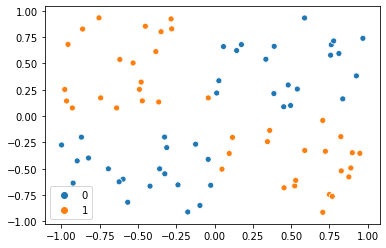

In [821]:
sns.scatterplot(x= x_xor, y= y_xor, hue=z_xor )

### 4. Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

In [822]:
# for output layer, turn continuous variable into categorical 
def final_prediction(activation_layer):
    def get_category(z):
        if z>= 0.5:
            return 1
        else:
            return 0
    vprime = np.vectorize(get_category)
    return vprime(activation_layer)

In [835]:
def backprop(x, y, starting_w, starting_b, lr, iteration):
    ws = starting_w
    bs = starting_b
    
    costs = []
    z_hats =[]
    
    for i in range(iteration):
        gradients, zs, activations = backprop_gradient(x, y, ws, bs)
        gradient_h = gradients[0] # 80 by 3
        gradient_o = gradients[1] # 80 by 1 
        a_in = zs[0] # 80 by 3
        a_h = activations[0] # 80 by 3 
        a_o = activations[1] # 80 by 1 
        w_h = ws[0] # 3 by 2 
        w_o = ws[1] # 1 by 3 
        b_h = bs[0] # 1 by 3 
        b_o = bs[1] # 1 by 1
        
        ### update weights 
        w_h_error = np.dot(a_in.T, gradient_h) # 2 by 3
        w_h = w_h - lr * w_h_error.T
        w_o_error = np.dot(a_h.T, gradient_o) #  3 by 1
        w_o = w_o - lr * w_o_error.T 
        ws = [w_h, w_o] # the newly updated weights
        
        ### update bias 
        b_h_error = np.average(gradient_h, axis = 0) # 3 by 1
        b_h = b_h - lr * b_h_error.T
        b_o_error = np.average(gradient_o, axis = 0) # 80 by 1
        b_o = b_o - lr * b_o_error.T
        bs = [b_h, b_o]
        
        ## Costs
        cost = np.average(-y*np.log(a_o)-(1-y)*np.log(1-a_o))
        costs.append(cost)
        
        ## Decision
        z_hat = final_prediction(activations[-1])
        z_hats.append(z_hat)
        
    return costs, z_hats

In [1118]:
np.random.seed(seed=30351)
#np.random.seed(seed=1234567)
test_ws = [np.random.randint(low=-10, high=10, size=(3,2)), np.random.randint(low=-3, high=3, size=(1,3))]
test_bs = [np.random.randint(low=-10, high=10, size=(1,3)), np.random.randint(low=-3, high=3, size=(1,1))]

In [1188]:
cost_traj, z_hat_traj = backprop(np.column_stack((x_xor, y_xor)), np.asmatrix(z_xor), test_ws, test_bs, 0.00003,1000)


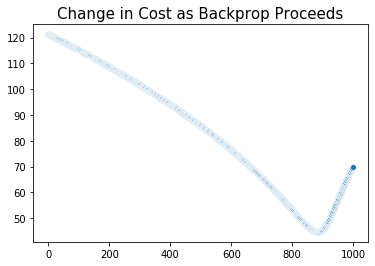

In [1189]:
ax= sns.scatterplot(x = range(1000), y = cost_traj)
ax.set_title('Change in Cost as Backprop Proceeds').set_fontsize(15)

### 5. Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.

In [1110]:
def backprop_momentum(x, y, starting_w, starting_b, lr, iteration, alpha):
    ws = starting_w
    bs = starting_b
    
    activation_traj = []
    costs = []
    z_hats = []
    
    velocity_h = np.zeros((len(y),3))
    velocity_o = np.zeros((len(y),1))

    
    for i in range(iteration):
        gradients, zs, activations = backprop_gradient(x, y, ws, bs)   
        
        ### Name each element, just for convinience purpose 
        gradient_h = gradients[0] # 80 by 3
        gradient_o = gradients[1] # 80 by 1 
        a_in  = zs[0] # 80 by 2
        a_h = activations[0] # 80 by 3 
        a_o = activations[1] # 80 by 1 
        w_h = ws[0] # 3 by 2 
        w_o = ws[1] # 1 by 3 
        b_h = bs[0] # 1 by 3 
        b_o = bs[1] # 1 by 1
        
        ### Velocity 
        velocity_h = alpha * velocity_h - lr * gradient_h 
        velocity_o = alpha * velocity_o - lr * gradient_o
        
        ### update weights 
        w_h_error = np.dot(a_in.T, velocity_h) # 2 by 3
        w_h = w_h + w_h_error.T
        w_o_error = np.dot(a_h.T, velocity_o) #  3 by 1
        w_o = w_o + w_o_error.T 
        ws = [w_h, w_o] # the newly updated weights
        
        ### update bias 
        b_h_error = np.average(velocity_h, axis = 0) # 3 by 1
        b_h = b_h + b_h_error.T
        b_o_error = np.average(velocity_o, axis = 0) # 80 by 1
        b_o = b_o + b_o_error.T
        bs = [b_h, b_o]
                
        ## Costs
        cost = np.average(np.average(-y*np.log(a_o)-(1-y)*np.log(1-a_o)))
        costs.append(cost)
        
        ## Decision
        activation_traj.append(activations[-1])
        z_hat = final_prediction(activations[-1])
        z_hats.append(z_hat)
        
    return costs, activation_traj, z_hats

In [1190]:
costs_m, a_m, prediction_m = backprop_momentum(np.column_stack((x_xor, y_xor)), np.asmatrix(z_xor), test_ws, test_bs, 0.00003,1000,0.3)


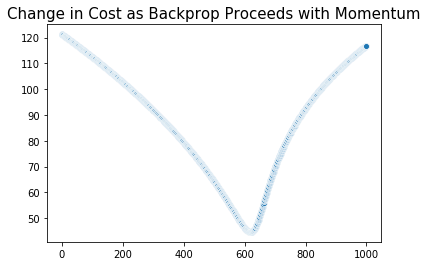

In [1191]:
ax= sns.scatterplot(x = range(1000), y = costs_m)
ax.set_title('Change in Cost as Backprop Proceeds with Momentum').set_fontsize(15)

The momentum method converges more quickly

### 6. Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot.

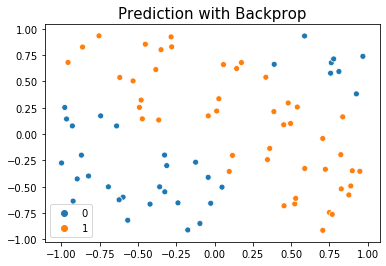

In [1192]:
ax= sns.scatterplot(x= x_xor, y= y_xor, hue=np.squeeze(np.asarray(z_hat_traj[np.argmin(cost_traj)])))
ax.set_title('Prediction with Backprop').set_fontsize(15)

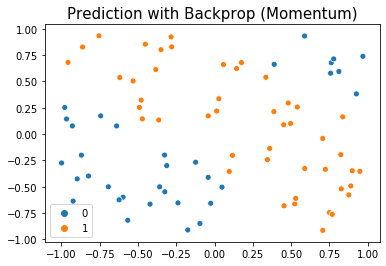

In [1193]:
ax= sns.scatterplot(x= x_xor, y= y_xor, hue=np.squeeze(np.asarray(prediction_m[np.argmin(costs_m)])))
ax.set_title('Prediction with Backprop (Momentum)').set_fontsize(15)